In [1]:
#Load libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tysserand import tysserand as ty
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 
from PIL import Image, ImageOps
import fcsparser

#set up working dir

data_dir = Path("/home/mouneem/tysserand/Imagin_LungPredict")
path = str("/home/mouneem/tysserand/Imagin_LungPredict/")
#path = str("/home/mouneem/tysserand/data/")


In [2]:
# FCS TO CSV
fileimg = "C1v1/NVA_21-003.IMMCORE.C1v1_18T047929-09-Z3-ImvessC1-4518.tif"
'''

FCSfile = ''
meta, data = fcsparser.parse(path+"fcs/"+FCSfile, reformat_meta=True)
type(data)
#df1 = df[['a', 'b']] // df1 = df.iloc[:, 0:2] 

data["x"] = (data["XMax"] + data["XMin"] ) / 2
data["y"] = (data["YMax"] + data["YMin"] ) / 2

col_is_marker = []
for col in list(data.columns):
    if col.count('+') + col.count('-') > 1:
        col_is_marker.append(True)
    else:
        col_is_marker.append(False)

print(len(col_is_marker))

marker = data.loc[:, col_is_marker]

classes = marker.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data["class"] = pd.factorize(classes)[0] 

nodes = data[['x','y',"class"]]
nodes.to_csv(path + "csv/"+FCSfile )

'''



'\n\nFCSfile = \'\'\nmeta, data = fcsparser.parse(path+"fcs/"+FCSfile, reformat_meta=True)\ntype(data)\n#df1 = df[[\'a\', \'b\']] // df1 = df.iloc[:, 0:2] \n\ndata["x"] = (data["XMax"] + data["XMin"] ) / 2\ndata["y"] = (data["YMax"] + data["YMin"] ) / 2\n\ncol_is_marker = []\nfor col in list(data.columns):\n    if col.count(\'+\') + col.count(\'-\') > 1:\n        col_is_marker.append(True)\n    else:\n        col_is_marker.append(False)\n\nprint(len(col_is_marker))\n\nmarker = data.loc[:, col_is_marker]\n\nclasses = marker.apply(lambda row: \'_\'.join(row.values.astype(str)), axis=1)\ndata["class"] = pd.factorize(classes)[0] \n\nnodes = data[[\'x\',\'y\',"class"]]\nnodes.to_csv(path + "csv/"+FCSfile )\n\n'

In [3]:

nodes = pd.read_csv(path+"csv/NVA_21-003.IMMCORE.C1v1_18T047929-09-Z3-ImvessC1-4518.csv")  

nodes.columns = ['id','x','y','class']

print(nodes.head())



ratio = 1
nodes = nodes.sample(n = round(len(nodes) / ratio) )
coords = nodes.loc[:,['x','y']].values



print('nodes:', len(nodes))
print('coords:', len(coords))

#load image
img = plt.imread(data_dir / fileimg)
#img = ImageOps.grayscale(img) # GRAYSCALE IMAGE


   id        x       y  class
0   1  65571.0  5573.0      0
1   2  65615.0  5585.5      0
2   3  66510.0  5397.5      0
3   4  66534.5  5414.5      0
4   5  66562.5  5450.5      0
nodes: 1527839
coords: 1527839


In [4]:
#make colors
class_colors = ['#F85446', '#813FE0', '#52DEF7', '#62E03F', '#FFCE36', '#FA6C17','#D805E3', '#0155FA', '#0BE35B', '#FFF117', '#DDFF7D', '#78E3C8','#000000','#000000','#000000','#000000','#000000','#000000','#000000']
classes = list(set(list(nodes['class'].unique())))
classes = list(set([str(i) for i in classes]))

print(classes)

dico_col = {}
for i in range(len(classes)):
    marker = classes[i]
    dico_col[marker] = class_colors[i]


colors = []
for cl in nodes['class']:
    colors.append(dico_col[str(cl)])


['3', '2', '7', '8', '10', '9', '11', '1', '5', '4', '6', '0']


In [5]:
""""
## TANSITION TO 0
coords[:,0] = coords[:,0] - min(coords[:,0])
coords[:,1] = coords[:,1] - min(coords[:,1])
"""
coords[:,1] = coords[:,1] + 1000
# Adjust size of image  

# nodes
min_x = min(coords[:, 0])
max_x = max(coords[:, 0])
nodes_width = max_x - min_x   

min_y = min(coords[:, 1])
max_y = max(coords[:, 1])
nodes_height = max_y - min_y   

# img
img_width = img.shape[0]
img_height = img.shape[1]


ratio_x = img_width / nodes_width
ratio_y = img_height / nodes_height
ratio = 1
print('ratio x', ratio_x, ' \n'
        'ratio y', ratio_y)

#img = cv2.flip(img, 0)
coords[:,0]  = (coords[:,0] * 0.1).round()
coords[:,1]  = (coords[:,1] * 0.1).round()
print('scaled UP')



ratio x 0.06186821937401413  
ratio y 0.1924832386649471
scaled UP


In [7]:

fig, ax = ty.showim(img, figsize=(100, 100))
col_nodes = colors
ax.scatter(coords[:,0] , coords[:,1], s = 2 , c=col_nodes,  zorder=10)

In [6]:
plt.savefig(path+'prev.png')

<Figure size 432x288 with 0 Axes>

# TYSSERAND

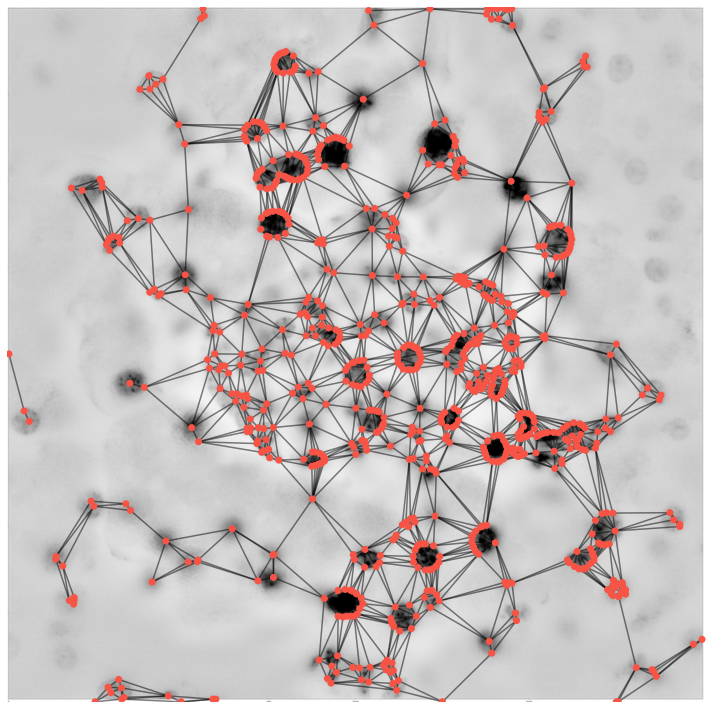

In [49]:
# superimpose network to mIF image

fig, ax = ty.showim(img, figsize=(10, 10))

pairs = ty.build_delaunay(coords)
#distances = ty.distance_neighbors(coords, pairs)
    
ty.plot_network(coords, pairs, col_nodes=colors, col_edges='k', ax=ax)

In [52]:
import matplotlib as mpl

label_cmap = mpl.cm.get_cmap('Set2')(range(8))
from skimage import color

masks = []

fig, ax = ty.showim(color.label2rgb(masks, bg_label=0, colors=label_cmap), origin='lower')
for (x,y) in coords:
    text = str(masks[y,x])
    plt.text(x-5, y, text, fontdict=None)

AttributeError: 'list' object has no attribute 'shape'